In [10]:
from scipy import stats, optimize, interpolate
from scipy.stats import alexandergovern
from scipy.stats import f_oneway
import pandas as pd
import numpy as np

In [2]:
# original_act = pd.read_pickle('Spike_Train_Prediction_Project/LocalEntropies_temporal&spatial_mean')
# original_rest = pd.read_pickle('Spike_Train_Prediction_Project/LocalEntropies_temporal&spatial_rest_mean')


In [3]:
data_rest = pd.read_pickle('Spike_Train_Prediction_Project/spike_trains_all_rest')

## Firing rate calculation
#### Window size = 100 ms  = 2000 sample bins (sampling frequency = 20 kHz)

## Rest:

In [4]:
new_list = data_rest['spike_times']
for i in range(len(new_list)):    
    for channel in new_list[i].keys():
        new_list[i][channel] = new_list[i][channel] [new_list[i][channel] < 12000000]

In [5]:
bin_size = 2000
experiment_len = 6001 # 10 min * 60s * 20kHz / bin_size
    
all_firing_rates = []
for i in range(len(new_list)):
    channels_firings = []
    for channel in new_list[i].keys():
        firing_temp = [0]*experiment_len
        for item in new_list[i][channel] /bin_size:
            firing_temp[int(item)]+=1
        channels_firings.append(firing_temp)
    all_firing_rates.append(channels_firings)
    
           
data_rest['firing_rates'] =  all_firing_rates    
            

In [6]:
data_rest.to_pickle('Spike_Train_Prediction_Project/spike_trains_all_rest')

## Gameplay: 

### Sampling 70 % of original data and saving the sampled files (complete dataset too large)

In [ ]:
data_original = pd.read_pickle('Spike_Train_Prediction_Project/spike_trains_all')


In [4]:
df_percent = (data_original.sample(frac=0.7).reset_index())

In [5]:
df_percent.drop(['index'], axis = 1, inplace = True) 


In [6]:
new_list = df_percent['spike_times']
for i in range(len(new_list)):    
    for channel in new_list[i].keys():
        new_list[i][channel] = new_list[i][channel] [new_list[i][channel] < 24000000]

In [7]:
df_percent.to_pickle('Spike_Train_Prediction_Project/spike_trains_all_sampled')

In [10]:
new_list.to_pickle('Spike_Train_Prediction_Project/Only_spike_trains_all_sampled')

### Reloading the sampled files


In [2]:
new_list = pd.read_pickle('Spike_Train_Prediction_Project/Only_spike_trains_all_sampled')

### Firing rate calculation

In [ ]:
bin_size = 2000
experiment_len = 12001 # 20 min * 60s * 20kHz / bin_size
all_firing_rates = []
for i in range(len(new_list)):
    channels_firings = []
    for channel in new_list[i].keys():
        firing_temp = [0]*experiment_len
        for item in new_list[i][channel] /bin_size:
            firing_temp[int(item)]+=1
        channels_firings.append(firing_temp)
    all_firing_rates.append(channels_firings)
    
           
# df_percent['firing_rates'] =  all_firing_rates    
   
    
    

In [6]:
df_percent = pd.read_pickle('Spike_Train_Prediction_Project/spike_trains_all_sampled')
df_percent['firing_rates'] =  all_firing_rates  

In [8]:
df_percent.to_pickle('Spike_Train_Prediction_Project/spike_trains_all_sampled')

## CA calculations

### Baseline (Pre training) period: 10 minutes of rest


In [3]:
from scipy import stats, optimize, interpolate
from scipy.stats import alexandergovern
from scipy.stats import f_oneway
import pandas as pd
import numpy as np

In [48]:
data = pd.read_pickle('Spike_Train_Prediction_Project/data_original')
data_locs = data[['channel','x','y']]
data_locs = data_locs.dropna()
data_locs = data_locs.drop_duplicates()
data_locs.reset_index(drop=True, inplace=True)

In [24]:
np.sqrt(np.max(data_locs['y'])**2 + np.max(data_locs['x'])**2)

4062.2999950766807

## Rest
### C_pre (baseline) - all 10 minutes

In [ ]:
data_rest = pd.read_pickle('Spike_Train_Prediction_Project/spike_trains_all_rest')

In [5]:
## 5 min = 5*60/0.1 = 3000 time bins
pre_cutoff = 6000
CA_pres = []
for culture in range(len(data_rest)):
    CA_pre = np.zeros(shape=(1,2))
    denom = 0
    nom_x = 0
    nom_y =0
    for i in range(len(data_rest['spike_times'][culture])):
        channel_num = int(list(data_rest['spike_times'][culture].keys())[i].split('_')[1])
        x = data_locs[data_locs['channel']== channel_num] ['x']
        y = data_locs[data_locs['channel']== channel_num] ['y']
        if not x.empty:
            denom += np.sum(np.array(data_rest['firing_rates'][culture][i])[0:pre_cutoff]) 
            nom_x += (np.sum(np.array(data_rest['firing_rates'][culture][i])[0:pre_cutoff])) * int(x)
            nom_y += (np.sum(np.array(data_rest['firing_rates'][culture][i])[0:pre_cutoff])) * int(y)
    CA_pre[:,0] = nom_x /denom
    CA_pre[:,1] = nom_y /denom
    CA_pres.append(CA_pre)
data_rest['CA_pre'] = CA_pres

In [6]:
data_rest.to_pickle('Spike_Train_Prediction_Project/spike_trains_all_rest')

## CA calculation window size:  5 min

### C_pre_1 & C_pre_2 (first and second 5 mins of rest)

In [49]:
## 5 min = 5*60/0.1 = 3000 time bins
pre_cutoff = 3000
CA_pres = []
for culture in range(len(data_rest)):
    CA_pre = np.zeros(shape=(1,2))
    denom = 0
    nom_x = 0
    nom_y =0
    for i in range(len(data_rest['spike_times'][culture])):
        channel_num = int(list(data_rest['spike_times'][culture].keys())[i].split('_')[1])
        x = data_locs[data_locs['channel']== channel_num] ['x']
        y = data_locs[data_locs['channel']== channel_num] ['y']
        if not x.empty:
            denom += np.sum(np.array(data_rest['firing_rates'][culture][i])[pre_cutoff:]) 
            nom_x += (np.sum(np.array(data_rest['firing_rates'][culture][i])[pre_cutoff:])) * int(x)
            nom_y += (np.sum(np.array(data_rest['firing_rates'][culture][i])[pre_cutoff:])) * int(y)
    CA_pre[:,0] = nom_x /denom
    CA_pre[:,1] = nom_y /denom
    CA_pres.append(CA_pre)
data_rest['CA_pre2'] = CA_pres

/tmp/ipykernel_2748/2633173987.py:17: RuntimeWarning: invalid value encountered in long_scalars
  CA_pre[:,0] = nom_x /denom
/tmp/ipykernel_2748/2633173987.py:18: RuntimeWarning: invalid value encountered in long_scalars
  CA_pre[:,1] = nom_y /denom
/tmp/ipykernel_2748/2633173987.py:17: RuntimeWarning: invalid value encountered in long_scalars
  CA_pre[:,0] = nom_x /denom
/tmp/ipykernel_2748/2633173987.py:18: RuntimeWarning: invalid value encountered in long_scalars
  CA_pre[:,1] = nom_y /denom


In [50]:
data_rest.to_pickle('Spike_Train_Prediction_Project/spike_trains_all_rest')

In [52]:
## 5 min = 5*60/0.1 = 3000 time bins
pre_cutoff = 3000
CA_pres = []
for culture in range(len(data_rest)):
    CA_pre = np.zeros(shape=(1,2))
    denom = 0
    nom_x = 0
    nom_y =0
    for i in range(len(data_rest['spike_times'][culture])):
        channel_num = int(list(data_rest['spike_times'][culture].keys())[i].split('_')[1])
        x = data_locs[data_locs['channel']== channel_num] ['x']
        y = data_locs[data_locs['channel']== channel_num] ['y']
        if not x.empty:
            denom += np.sum(np.array(data_rest['firing_rates'][culture][i])[0:pre_cutoff]) 
            nom_x += (np.sum(np.array(data_rest['firing_rates'][culture][i])[0:pre_cutoff])) * int(x)
            nom_y += (np.sum(np.array(data_rest['firing_rates'][culture][i])[0:pre_cutoff])) * int(y)
    CA_pre[:,0] = nom_x /denom
    CA_pre[:,1] = nom_y /denom
    CA_pres.append(CA_pre)
data_rest['CA_pre1'] = CA_pres

In [53]:
data_rest.to_pickle('Spike_Train_Prediction_Project/spike_trains_all_rest')

## Gameplay
### C_post_1 & 2 & 3& 4 (every 5 min window)

In [3]:
df_percent = pd.read_pickle('Spike_Train_Prediction_Project/spike_trains_all_sampled')

In [7]:
## 5 min = 5*60/0.1 = 3000 time bins
pre_cutoff = 3000
CA_pres = []
for culture in range(len(df_percent)):
    CA_pre = np.zeros(shape=(1,2))
    denom = 0
    nom_x = 0
    nom_y =0
    for i in range(len(df_percent['spike_times'][culture])):
        channel_num = int(list(df_percent['spike_times'][culture].keys())[i].split('_')[1])
        x = data_locs[data_locs['channel']== channel_num] ['x']
        y = data_locs[data_locs['channel']== channel_num] ['y']
        if not x.empty:
            denom += np.sum(np.array(df_percent['firing_rates'][culture][i])[0:pre_cutoff]) 
            nom_x += (np.sum(np.array(df_percent['firing_rates'][culture][i])[0:pre_cutoff])) * int(x)
            nom_y += (np.sum(np.array(df_percent['firing_rates'][culture][i])[0:pre_cutoff])) * int(y)
    CA_pre[:,0] = nom_x /denom
    CA_pre[:,1] = nom_y /denom
    CA_pres.append(CA_pre)
df_percent['CA_pre_1'] = CA_pres

In [8]:
df_percent.to_pickle('Spike_Train_Prediction_Project/spike_trains_all_sampled')

In [ ]:
## 5 min = 5*60/0.1 = 3000 time bins
pre_cutoff = 3000
CA_pres = []
for culture in range(len(df_percent)):
    CA_pre = np.zeros(shape=(1,2))
    denom = 0
    nom_x = 0
    nom_y =0
    for i in range(len(df_percent['spike_times'][culture])):
        channel_num = int(list(df_percent['spike_times'][culture].keys())[i].split('_')[1])
        x = data_locs[data_locs['channel']== channel_num] ['x']
        y = data_locs[data_locs['channel']== channel_num] ['y']
        if not x.empty:
            denom += np.sum(np.array(df_percent['firing_rates'][culture][i])[pre_cutoff:2*pre_cutoff]) 
            nom_x += (np.sum(np.array(df_percent['firing_rates'][culture][i])[pre_cutoff:2*pre_cutoff])) * int(x)
            nom_y += (np.sum(np.array(df_percent['firing_rates'][culture][i])[pre_cutoff:2*pre_cutoff])) * int(y)
    CA_pre[:,0] = nom_x /denom
    CA_pre[:,1] = nom_y /denom
    CA_pres.append(CA_pre)
df_percent['CA_pre_2'] = CA_pres

In [5]:
df_percent.to_pickle('Spike_Train_Prediction_Project/spike_trains_all_sampled')

In [ ]:
## 5 min = 5*60/0.1 = 3000 time bins
pre_cutoff = 3000
CA_pres = []
for culture in range(len(df_percent)):
    CA_pre = np.zeros(shape=(1,2))
    denom = 0
    nom_x = 0
    nom_y =0
    for i in range(len(df_percent['spike_times'][culture])):
        channel_num = int(list(df_percent['spike_times'][culture].keys())[i].split('_')[1])
        x = data_locs[data_locs['channel']== channel_num] ['x']
        y = data_locs[data_locs['channel']== channel_num] ['y']
        if not x.empty:
            denom += np.sum(np.array(df_percent['firing_rates'][culture][i])[2*pre_cutoff:3*pre_cutoff]) 
            nom_x += (np.sum(np.array(df_percent['firing_rates'][culture][i])[2*pre_cutoff:3*pre_cutoff])) * int(x)
            nom_y += (np.sum(np.array(df_percent['firing_rates'][culture][i])[2*pre_cutoff:3*pre_cutoff])) * int(y)
    CA_pre[:,0] = nom_x /denom
    CA_pre[:,1] = nom_y /denom
    CA_pres.append(CA_pre)
df_percent['CA_pre_3'] = CA_pres

In [8]:
df_percent.to_pickle('Spike_Train_Prediction_Project/spike_trains_all_sampled')

In [ ]:
## 5 min = 5*60/0.1 = 3000 time bins
pre_cutoff = 3000
CA_pres = []
for culture in range(len(df_percent)):
    CA_pre = np.zeros(shape=(1,2))
    denom = 0
    nom_x = 0
    nom_y =0
    for i in range(len(df_percent['spike_times'][culture])):
        channel_num = int(list(df_percent['spike_times'][culture].keys())[i].split('_')[1])
        x = data_locs[data_locs['channel']== channel_num] ['x']
        y = data_locs[data_locs['channel']== channel_num] ['y']
        if not x.empty:
            denom += np.sum(np.array(df_percent['firing_rates'][culture][i])[3*pre_cutoff:]) 
            nom_x += (np.sum(np.array(df_percent['firing_rates'][culture][i])[3*pre_cutoff:])) * int(x)
            nom_y += (np.sum(np.array(df_percent['firing_rates'][culture][i])[3*pre_cutoff:])) * int(y)
    CA_pre[:,0] = nom_x /denom
    CA_pre[:,1] = nom_y /denom
    CA_pres.append(CA_pre)
df_percent['CA_pre_4'] = CA_pres

In [5]:
df_percent.to_pickle('Spike_Train_Prediction_Project/spike_trains_all_sampled')

## Distance from Rest (baseline) centroid:

In [23]:
df_gameplay = pd.read_pickle('Spike_Train_Prediction_Project/spike_trains_all_sampled')

In [14]:
data_rest = pd.read_pickle('Spike_Train_Prediction_Project/spike_trains_all_rest')

In [15]:
# pd.DataFrame(data_rest['CA_pre'].tolist(),index=data_rest['chip_id']).mean(level=0).agg(np.array,1)
data_rest_mean = pd.DataFrame(data_rest.groupby(['chip_id','tag','date']).mean()).reset_index()
data_rest_mean['CA_pre_mean'] = np.array(data_rest.groupby(['chip_id','tag','date'])['CA_pre'].apply(np.mean))
data_rest_mean


,chip_id,tag,date,session,CA_pre_mean
0,11570,GFP_rate_code_reseed,2021-06-23,2,"[[1999.6479211515466, 1002.8589134897852]]"
1,11570,GFP_rate_code_reseed,2021-06-24,2,"[[1938.383791573236, 849.7005079006788]]"
2,11570,GFP_rate_code_reseed,2021-06-25,2,"[[1952.5083777139662, 891.5551809363218]]"
3,11597,GFP__rate_code_reseed,2021-06-23,2,"[[2026.263450054887, 1052.2268412699689]]"
4,11597,GFP__rate_code_reseed,2021-06-24,2,"[[2046.752387963808, 1069.669991614223]]"
...,...,...,...,...,...
119,9501i,prim_test_rate_code,2021-04-20,2,"[[1997.6721977467448, 789.3244482336415]]"
120,9501i,prim_test_rate_code,2021-04-21,2,"[[1915.6973571502394, 753.459403041847]]"
121,9501i,prim_test_rate_code,2021-04-22,2,"[[1899.4297292412139, 741.7204156281407]]"
122,9501i,prim_test_rate_code,2021-04-23,2,"[[1973.0963145616656, 812.503490159557]]"


### Gameplay

In [24]:
chip_id =[]
tag =[]
date =[]
session =[]
CA_pre = []
CA_prepost1 = []
CA_prepost2 = []
CA_prepost3 = []
CA_prepost4 = []
data_gameplay_CAs = pd.DataFrame()
for index in range(len(df_gameplay)):
    for index2 in range(len(data_rest_mean)):
        if (data_rest_mean['chip_id'][index2] == df_gameplay['chip_id'][index] and data_rest_mean['date'][index2]==df_gameplay['date'][index] and data_rest_mean['tag'][index2]==df_gameplay['tag'][index] ):
            chip_id.append(df_gameplay['chip_id'][index2])
            date.append(df_gameplay['date'][index2])
            session.append(df_gameplay['session'][index2])
            tag.append(df_gameplay['tag'][index2])
            
            CA_pre.append(data_rest_mean['CA_pre_mean'][index2])
            CA_prepost1.append(np.linalg.norm(np.array(df_gameplay['CA_pre_1'][index]) - np.array(data_rest_mean['CA_pre_mean'][index2])))
            CA_prepost2.append(np.linalg.norm(np.array(df_gameplay['CA_pre_2'][index]) - np.array(data_rest_mean['CA_pre_mean'][index2])))
            CA_prepost3.append(np.linalg.norm(np.array(df_gameplay['CA_pre_3'][index]) - np.array(data_rest_mean['CA_pre_mean'][index2])))
            CA_prepost4.append(np.linalg.norm(np.array(df_gameplay['CA_pre_4'][index]) - np.array(data_rest_mean['CA_pre_mean'][index2])))
            
data_gameplay_CAs['chip_id'] = chip_id
data_gameplay_CAs['session'] = session
data_gameplay_CAs['date'] = date
data_gameplay_CAs['tag'] = tag
data_gameplay_CAs['CA_pre'] = CA_pre
data_gameplay_CAs['CA_postpre1'] = CA_prepost1
data_gameplay_CAs['CA_postpre2'] = CA_prepost2
data_gameplay_CAs['CA_postpre3'] = CA_prepost3
data_gameplay_CAs['CA_postpre4'] = CA_prepost4



In [26]:
data_gameplay_CAs.to_pickle('Spike_Train_Prediction_Project/CA_distance')

### Rest

In [56]:
chip_id =[]
tag =[]
date =[]
session =[]
CA_pre = []
CA_prepost1 = []
CA_prepost2 = []
CA_prepost3 = []


data_rest_CAs = pd.DataFrame()
for index in range(len(data_rest)):
    for index2 in range(len(data_rest_mean)):
        if (data_rest_mean['chip_id'][index2] == data_rest['chip_id'][index] and data_rest_mean['date'][index2]==data_rest['date'][index] and data_rest_mean['tag'][index2]==data_rest['tag'][index] ):
            chip_id.append(data_rest['chip_id'][index2])
            date.append(data_rest['date'][index2])
            session.append(data_rest['session'][index2])
            tag.append(data_rest['tag'][index2])
            
            CA_pre.append(data_rest_mean['CA_pre_mean'][index2])
            CA_prepost1.append(np.linalg.norm(np.array(data_rest['CA_pre'][index]) - np.array(data_rest_mean['CA_pre_mean'][index2])))
            CA_prepost2.append(np.linalg.norm(np.array(data_rest['CA_pre1'][index]) - np.array(data_rest_mean['CA_pre_mean'][index2])))
            CA_prepost3.append(np.linalg.norm(np.array(data_rest['CA_pre2'][index]) - np.array(data_rest_mean['CA_pre_mean'][index2])))

data_rest_CAs['chip_id'] = chip_id
data_rest_CAs['session'] = session
data_rest_CAs['date'] = date
data_rest_CAs['tag'] = tag
data_rest_CAs['CA_pre'] = CA_pre
data_rest_CAs['CA_prepre0'] = CA_prepost1
data_rest_CAs['CA_prepre1'] = CA_prepost2
data_rest_CAs['CA_prepre2'] = CA_prepost3


In [57]:
data_rest_CAs.to_pickle('Spike_Train_Prediction_Project/CA_distance_rest')

In [44]:
# data_rest_CAs

## Plotting:

In [45]:
import pandas as pd
import numpy as np
data_gameplay_CAs = pd.read_pickle('Spike_Train_Prediction_Project/CA_distance')
data_rest_CAs= pd.read_pickle('Spike_Train_Prediction_Project/CA_distance_rest')

In [46]:
num_regions =4
plot_data1 = pd.DataFrame(index=np.arange(len(data_gameplay_CAs)*num_regions),columns=['means','windows'])


means_vec =[]
window_vec =[]
status_vec = []
for groups in ['CA_postpre1','CA_postpre2','CA_postpre3','CA_postpre4']:
        means_vec.append(np.array(data_gameplay_CAs[groups]))
        window_vec.append([groups[-1]]*len(data_gameplay_CAs))
        status_vec.append(['Gameplay']*len(data_gameplay_CAs))
         

means_flat_list = [item for sublist in means_vec for item in sublist] 
windows_flat_list = [item for sublist in window_vec for item in sublist] 
status_flat_list = [item for sublist in status_vec for item in sublist] 


        
plot_data1['means'] = means_flat_list
plot_data1['windows'] = windows_flat_list
plot_data1['status'] =status_flat_list




num_regions =2
plot_data2 = pd.DataFrame(index=np.arange(len(data_rest_CAs)*num_regions),columns=['means','windows'])


means_vec =[]
window_vec =[]
status_vec = []
for groups in ['CA_prepre1','CA_prepre2']:
        means_vec.append(np.array(data_rest_CAs[groups]))
        window_vec.append([str(int(groups[-1])-2)]*len(data_rest_CAs) )
        status_vec.append(['Rest']*len(data_rest_CAs))
         

means_flat_list = [item for sublist in means_vec for item in sublist] 
windows_flat_list = [item for sublist in window_vec for item in sublist] 
status_flat_list = [item for sublist in status_vec for item in sublist] 


        
plot_data2['means'] = means_flat_list
plot_data2['windows'] = windows_flat_list
plot_data2['status'] =status_flat_list




In [47]:
all_data = [plot_data2, plot_data1]
plot_data = pd.concat(all_data)
plot_data

,means,windows,status
0,41.317422,-1,Rest
1,32.545178,-1,Rest
2,126.245904,-1,Rest
3,10.227182,-1,Rest
4,23.868926,-1,Rest
...,...,...,...
975,60.638445,4,Gameplay
976,110.649381,4,Gameplay
977,29.459678,4,Gameplay
978,34.784035,4,Gameplay


/tmp/ipykernel_3318/4126440554.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


<function matplotlib.pyplot.show(close=None, block=None)>

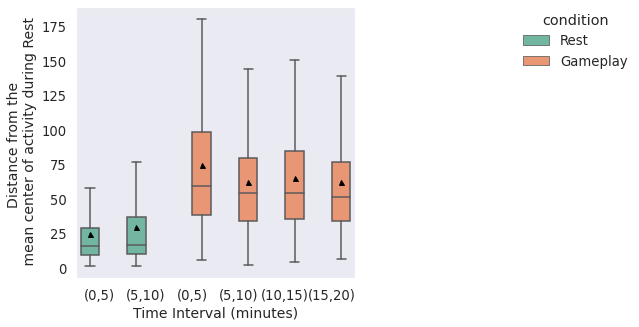

In [48]:
#labels = SCdf.Group.unique()
#x_pos = np.arange(len(labels))

import seaborn as sns
import matplotlib.pyplot as plt
x = plot_data['windows']
y = plot_data['means']
hue = plot_data['status']
sns.set(style="darkgrid")
sns.set(font_scale=1.2)
palette = sns.color_palette("Set2", 2)
ax = sns.boxplot(data=plot_data, x=x, y=y,hue =hue, palette=palette, showfliers=False, showmeans = True, 
                 meanprops={"markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"})
labels = ['(0,5)','(5,10)','(0,5)','(5,10)','(10,15)','(15,20)']
# # ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
# ax.set_title('Mean local entropy over 355 Normalized Gameplay recordings')
ax.set_ylabel('Distance from the \n mean center of activity during Rest',fontsize =14)
ax.set_xlabel('Time Interval (minutes)',fontsize =14)
ax.grid(False)


# ax.legend([0, 1], ["post", "prior"], fontsize = 14)
L = plt.legend(loc='upper right', bbox_to_anchor=(2, 1), title = "condition", borderaxespad=0.1, frameon=False)
# L.get_texts()[0].set_text('post')
# L.get_texts()[1].set_text('prior')


# L = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',  title = "Subpopulation", borderaxespad=0.1)
#Plot t-test between groups
# y, h, col = 2, 0.05, 'k'
# x00, x01 = -.2, .2
# x10, x11 = .8, 1.2

# plt.plot([x00, x00, x01, x01], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text(((x00 + x01)/2), y+ h, "****", ha='center', va='bottom', color=col, fontsize=8)
# plt.plot([x10, x10, x11, x11], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text(((x10 + x11)/2), y+ h, "****", ha='center', va='bottom', color=col, fontsize=8)
# ax.set_ylim([-0.01, 0.17])

# plt.axvline(x=1.5,color='k')
sns.set(rc={'figure.figsize':(5,5)})
plt.tight_layout()
# ax.get_legend().remove()
plt.savefig('Spike_Train_Prediction_Project/mean_CA_vs_Rest.pdf', bbox_inches='tight')
plt.show

/tmp/ipykernel_3318/2910332619.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


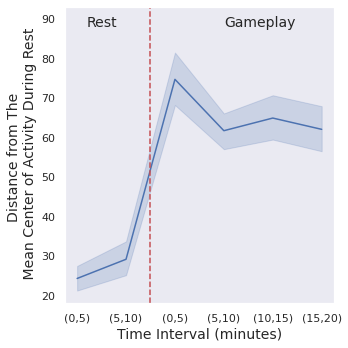

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = plot_data


fig, ax = plt.subplots()

sns.lineplot(ax = ax,
             data = df,
             x = 'windows',
             y = 'means')
labels = ['(0,5)','(5,10)','(0,5)','(5,10)','(10,15)','(15,20)']
# # ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
plt.axvline(x=1.5, color='r', linestyle='--')
x_pos = 0.2
y_pos = 88
plt.text(x_pos, y_pos, "Rest",fontsize =14)

x_pos = 3
y_pos = 88
plt.text(x_pos, y_pos, "Gameplay",fontsize =14)


ax.set_ylabel('Distance from The \n Mean Center of Activity During Rest',fontsize =14)
ax.set_xlabel('Time Interval (minutes)',fontsize =14)
ax.grid(False)
ax.set_ylim([18, 93])

# sns.set(rc={'figure.figsize':(3,3)})
plt.tight_layout()
# ax.get_legend().remove()
plt.savefig('Spike_Train_Prediction_Project/mean_CA_vs_Rest_line.pdf', bbox_inches='tight')

plt.show()

## Stats:

In [50]:
CAs_rest = ((np.array(plot_data[plot_data['windows']=='-1']['means']))+(np.array(plot_data[plot_data['windows']=='0']['means']) ))/2
CAs_act = ((np.array(plot_data[plot_data['windows']=='1']['means']))+(np.array(plot_data[plot_data['windows']=='2']['means']) )
          +(np.array(plot_data[plot_data['windows']=='4']['means']) )+(np.array(plot_data[plot_data['windows']=='4']['means']) ))/4

CAs_rest = CAs_rest[~np.isnan(CAs_rest)]
CAs_act = CAs_act[~np.isnan(CAs_act)]

alexandergovern(CAs_rest,CAs_act)





AlexanderGovernResult(statistic=160.33934955384174, pvalue=9.539047757302423e-37)

In [51]:
import pingouin as pg
df1 = pd.DataFrame()
df2= pd.DataFrame()

df1['CA'] = CAs_rest
df2['CA'] = CAs_act
df1['group_name'] = 'rest'
df2['group_name'] = 'act'

df = pd.concat([df1,df2])


post_hoc_test =  pg.anova(data=df, dv='CA', between='group_name',detailed=True).round(3)
post_hoc_test



,Source,SS,DF,MS,F,p-unc,np2
0,group_name,164159.557,1,164159.557,191.949,0.0,0.292
1,Within,398535.337,466,855.226,NaN,NaN,NaN


In [52]:
post_hoc_test =  pg.anova(data=df, dv='CA', between='group_name',detailed=False).round(3)
post_hoc_test

,Source,ddof1,ddof2,F,p-unc,np2
0,group_name,1,466,191.949,0.0,0.292


In [31]:
import pingouin as pg
df1 = pd.DataFrame()
df2= pd.DataFrame()
df3= pd.DataFrame()
df4= pd.DataFrame()
df5= pd.DataFrame()
df6= pd.DataFrame()
df1['CA'] = np.array(plot_data[plot_data['windows']=='-1']['means'])
df2['CA'] = np.array(plot_data[plot_data['windows']=='0']['means'])
df3['CA'] = np.array(plot_data[plot_data['windows']=='1']['means'])
df4['CA'] = np.array(plot_data[plot_data['windows']=='2']['means'])
df5['CA'] = np.array(plot_data[plot_data['windows']=='3']['means'])
df6['CA'] = np.array(plot_data[plot_data['windows']=='4']['means'])

df1['group_name'] = 'rest_0'
df2['group_name'] = 'rest_1'

df3['group_name'] = 'act_0'
df4['group_name'] = 'act_1'
df5['group_name'] = 'act_2'
df6['group_name'] = 'act_3'
df = pd.concat([df1,df2,df3,df4,df5,df6])



In [32]:
post_hoc_test =  pg.pairwise_gameshowell(data=df, dv='CA', between='group_name').round(3)
post_hoc_test

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,act_0,act_1,74.636,61.648,12.989,4.155,3.126,436.865,0.023,0.283
1,act_0,act_2,74.636,64.845,9.791,4.463,2.194,470.349,0.242,0.200
2,act_0,act_3,74.636,61.992,12.644,4.491,2.816,472.174,0.057,0.256
3,act_0,rest_0,74.636,24.278,50.358,3.730,13.502,339.037,0.001,1.234
4,act_0,rest_1,74.636,29.134,45.502,3.979,11.435,400.205,0.001,1.047
5,act_1,act_2,61.648,64.845,-3.198,3.752,-0.852,458.846,0.900,-0.078
6,act_1,act_3,61.648,61.992,-0.344,3.786,-0.091,456.264,0.900,-0.008
7,act_1,rest_0,61.648,24.278,37.369,2.841,13.152,408.805,0.001,1.205
8,act_1,rest_1,61.648,29.134,32.514,3.162,10.283,464.372,0.001,0.944
9,act_2,act_3,64.845,61.992,2.853,4.121,0.692,471.896,0.900,0.063
